In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 3: Image Enhancement III: Sharpening

In this task, we will implement unsharp masking in two different forms:
1. Using laplacian as mentioned in lecture notes, i.e. $\dot{f} = \nabla^2 f$
2. Using difference of original and blurred images, i.e. $\dot{f} = f - f_{blur}$

Unsharp masking:
$$
f = f + A\dot{f}
$$

In [8]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-pxthr6xp
  Created wheel for ee604-plugins: filename=ee604_plugins-0.2.2-cp36-none-any.whl size=2313 sha256=9e6b3f8b4c25171fdfafe45e38a010fdfbe58c57a44f173b38f8a81a056db4ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-rtzlft9r/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-pxthr6xp


In [9]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=2, task_no=3) # download data for this assignment

Download Complete!


In [17]:
def unsharp_laplacian(img, laplacian_operator, A=1):
    '''
    Write a program to implement unsharp masking based on laplacian operator.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + laplacian_operator - a 3 x 3 laplacian operator, refer to slides.
    + A - strength parameter of unsharp masking
    
    Ouputs:
    + out_img - Unsharp masked grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.filter2D() to perform 2D convolution
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    lap_img = cv2.filter2D(img, -1, laplacian_operator)
    
    out_img = img + A*lap_img

    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        if(out_img[i][j]<0): out_img[i][j] = 0
        if(out_img[i][j]>255): out_img[i][j] = 255
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [37]:
def unsharp_blur(img, blur_kernel=5, A=1):
    '''
    Write a program to implement unsharp masking based on difference of original and blurred image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + A - strength parameter of unsharp masking
    + blur_kernel - kernel size for gaussian blur operation. 
                    For gaussian kernel use sigma = nearest integer to (blur_kernel/5)
    
    Ouputs:
    + out_img - Unsharp masked grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.GaussianBlur to perform blur operations
    
    Hint:
    + 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    sigma = round(blur_kernel/5)
    blur_img = cv2.GaussianBlur(img, (blur_kernel, blur_kernel), sigma)
    blur_img = np.float32(blur_img)
    out_img = img + A*(img - blur_img)
    
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        if(out_img[i][j]<0): out_img[i][j] = 0
        if(out_img[i][j]>255): out_img[i][j] = 255


    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Test

---

In [38]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare the different methods for different images

car = cv2.imread('data/car_wiki.png', 0)
moon = cv2.imread('data/moon.jpg', 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    plt.title(name)


-------------------------------------
#    Car | A: -2
-------------------------------------


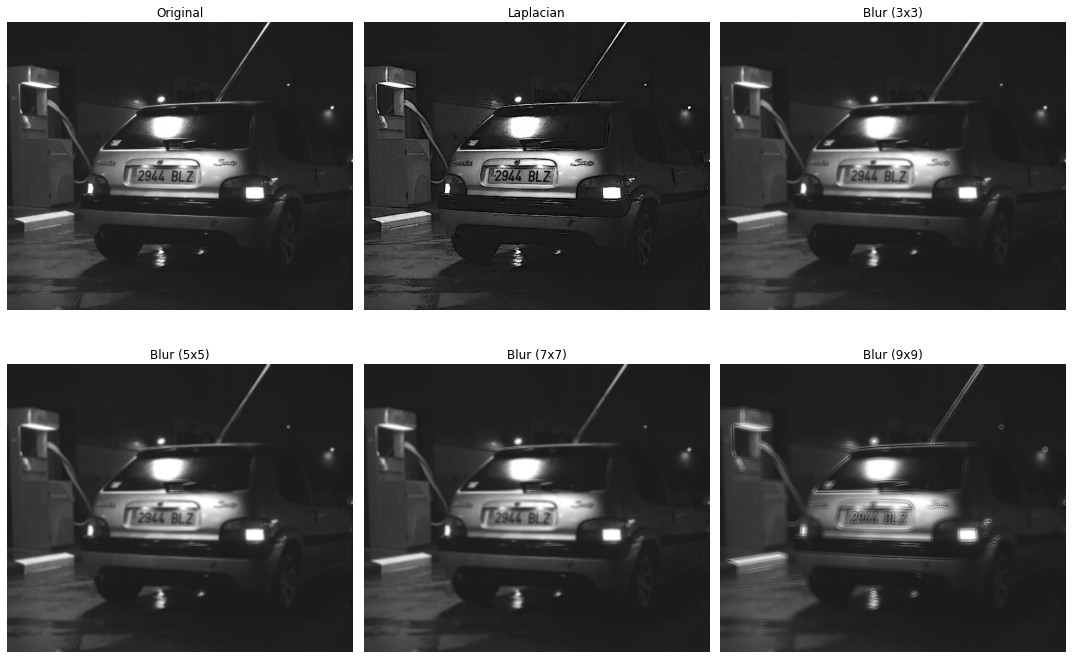


-------------------------------------
#    Car | A: -1
-------------------------------------


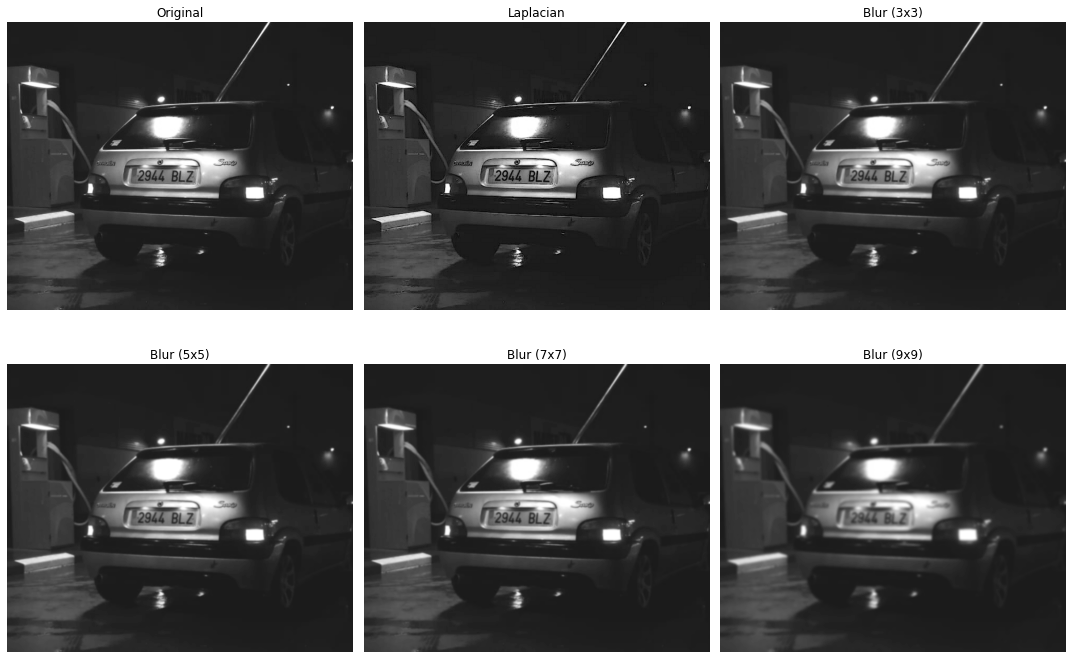


-------------------------------------
#    Car | A: 1
-------------------------------------


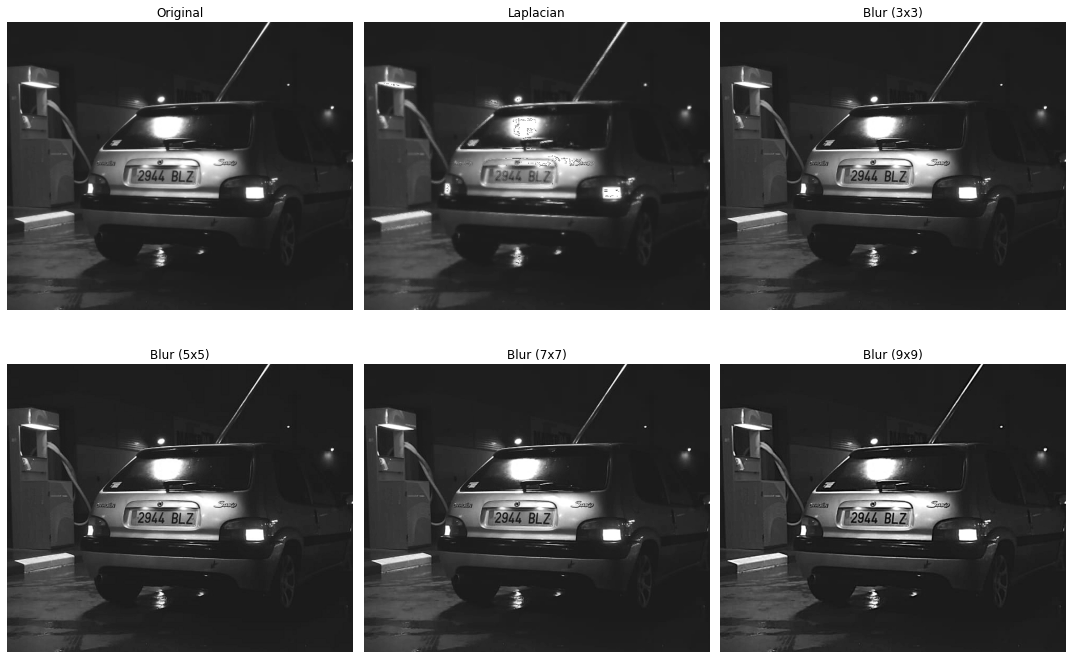


-------------------------------------
#    Car | A: 2
-------------------------------------


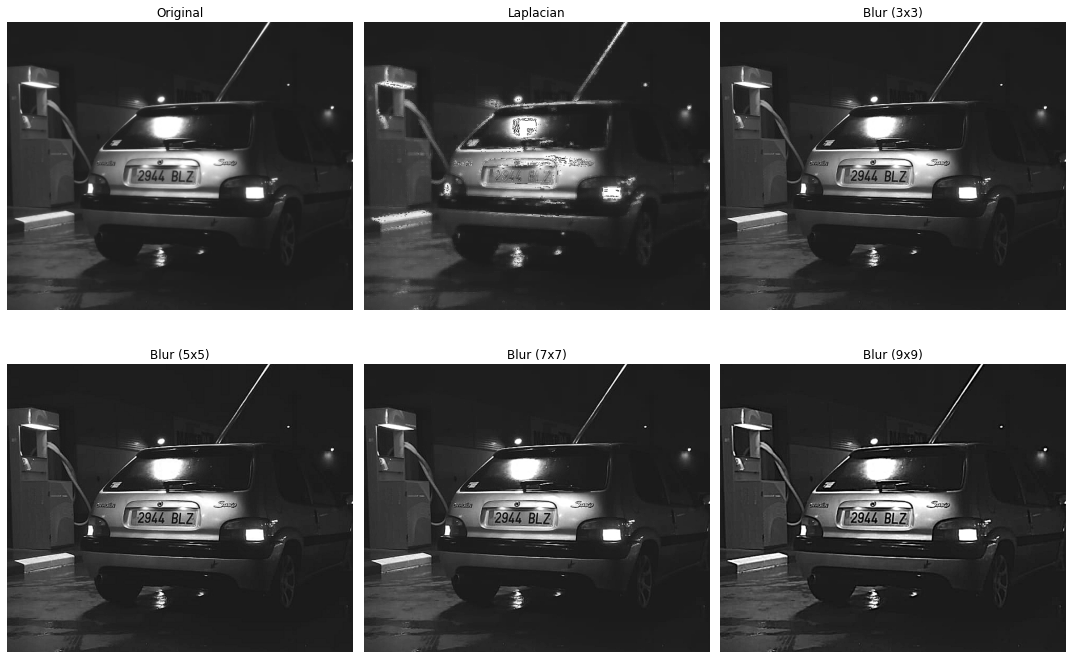


-------------------------------------
#    Moon | A: -2
-------------------------------------


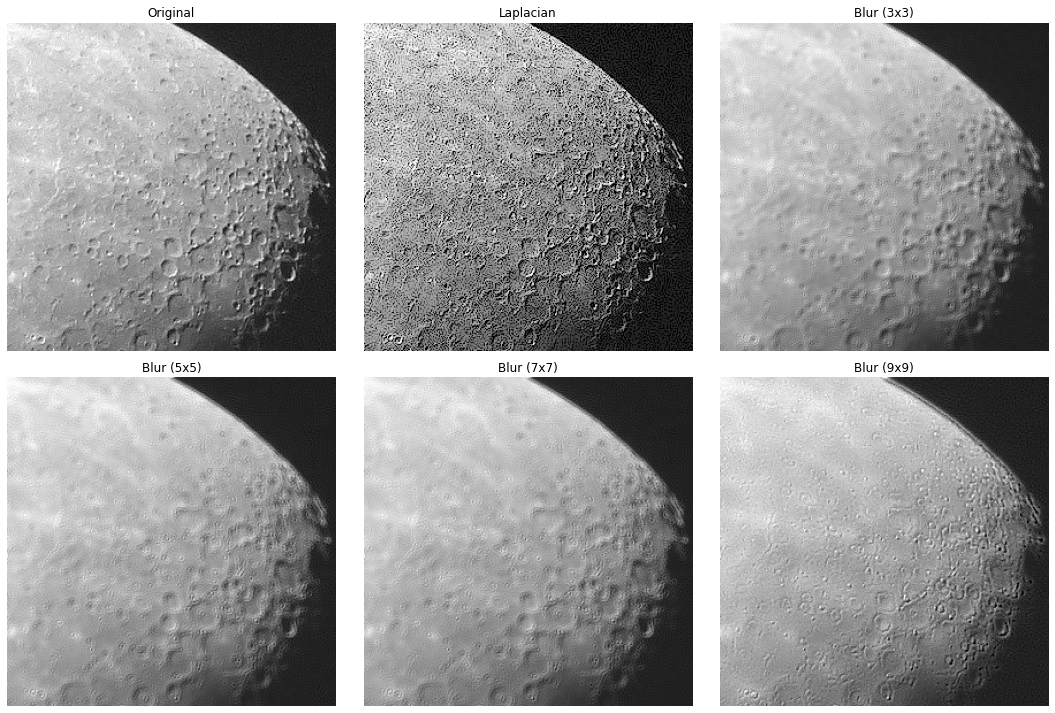


-------------------------------------
#    Moon | A: -1
-------------------------------------


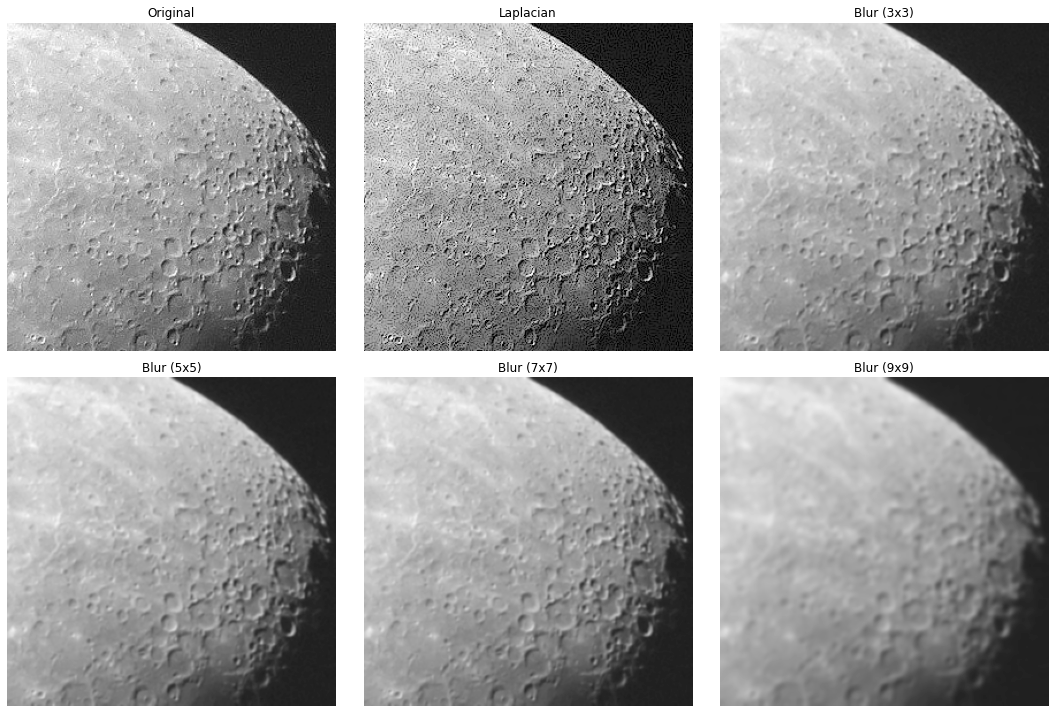


-------------------------------------
#    Moon | A: 1
-------------------------------------


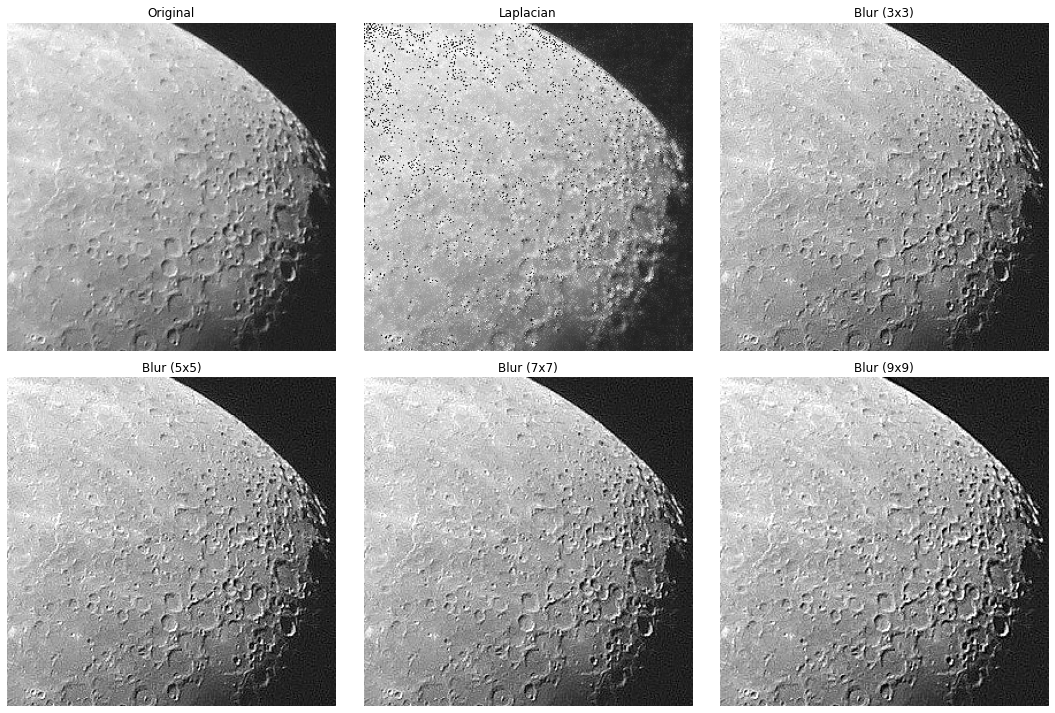


-------------------------------------
#    Moon | A: 2
-------------------------------------


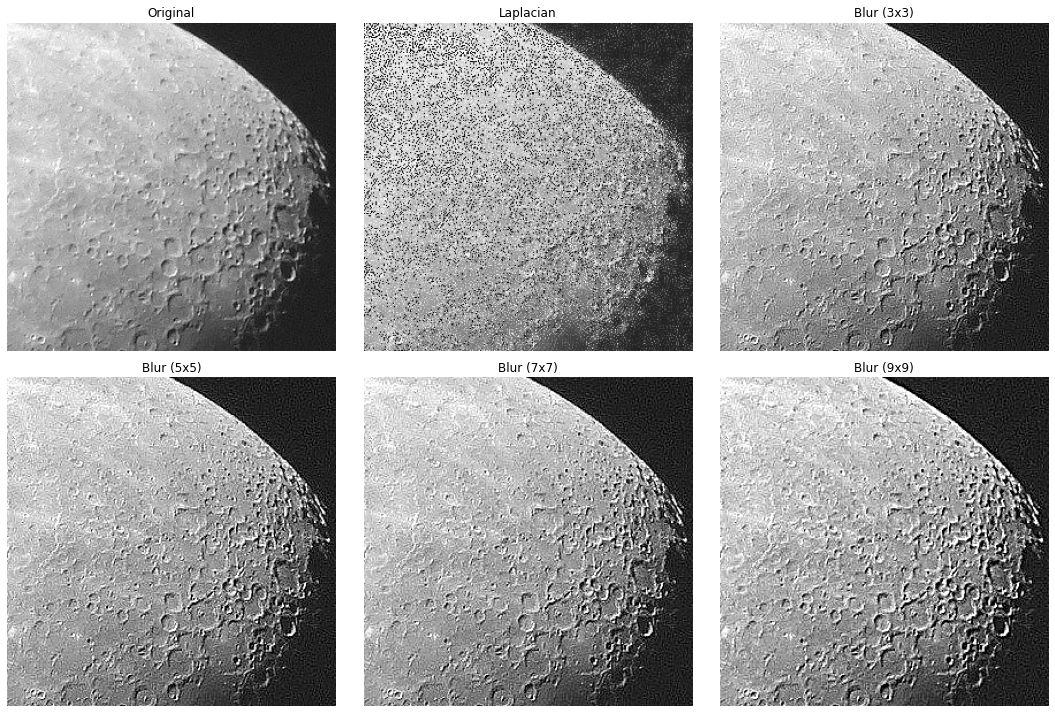

In [39]:
img_arr = [car, moon]
img_caption = ["Car", "Moon"]
laplacian_operator = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

for i in range(2):
    for A in [-2, -1, 1, 2]:
        print("\n-------------------------------------")
        print("#   ", img_caption[i], "| A:", A)
        print("-------------------------------------")

        fig = plt.figure(figsize=(15, 10))
        plot_frame(2, 3, 0, img_arr[i], "Original")

        tmp_img = unsharp_laplacian(np.copy(img_arr[i]), laplacian_operator, A=A)
        plot_frame(2, 3, 1, tmp_img, "Laplacian")

        j = 0
        for kernel_size in [3, 5, 7, 9]:
            tmp_img = unsharp_blur(np.copy(img_arr[i]), blur_kernel=kernel_size, A=A)
            plot_frame(2, 3, 2+j, tmp_img, "Blur (" + str(kernel_size) + "x" + str(kernel_size) + ")")
            j += 1
        
        fig.tight_layout()
        plt.show()

In [40]:
your_observation = """
For Car, best sharpened image is for A=-1 using Laplacian. 
For A= 1,2, Unsharp Blur sharpens the image well. 
For A =-1,-2, Laplacian sharpens the image very well than Unsharp Blur 

For Moon, again, best sharpened image is for A=-1 using Laplacian. 
Laplacian fails for A=1,2 like previous image,  and Unsharp Blur shapens better. 
And for A=-1,-2 laplacian sharpens the image well, but the unsharp blur doesn't sharpen well.
"""

print(your_observation)


For Car, best sharpened image is for A=-1 using Laplacian. 
For A= 1,2, Unsharp Blur sharpens the image well. 
For A =-1,-2, Laplacian sharpens the image very well than Unsharp Blur 

For Moon, again, best sharpened image is for A=-1 using Laplacian. 
Laplacian fails for A=1,2 like previous image,  and Unsharp Blur shapens better. 
And for A=-1,-2 laplacian sharpens the image well, but the unsharp blur doesn't sharpen well.



In [31]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

lap_img = []
blur_img = []

img_arr = [car, moon]
laplacian_operator = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

for i in range(2):
    for A in [-2, -1, 1, 2]:
        tmp_img = unsharp_laplacian(np.copy(img_arr[i]), laplacian_operator, A=A)
        lap_img.append(tmp_img)

        j = 0
        for kernel_size in [3, 5, 7, 9]:
            tmp_img = unsharp_blur(np.copy(img_arr[i]), blur_kernel=kernel_size, A=A)
            blur_img.append(tmp_img)
            j += 1

gen_imgs = lap_img+blur_img
task3_submission = np.array(gen_imgs)